<a href="https://colab.research.google.com/github/damikag/ML-GI_tract_Image_Classifier/blob/master/simple-model/SimpleModel1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [2]:
!cp 'drive/My Drive/ML/DatasetZip/train-Set.zip' .
!cp 'drive/My Drive/ML/DatasetZip/test-Set.zip' .
!ls

drive  sample_data  test-Set.zip  train-Set.zip


In [3]:
!unzip train-Set.zip
!unzip test-Set.zip

Archive:  train-Set.zip
   creating: train-Set/
   creating: train-Set/normal-z-line/
  inflating: train-Set/normal-z-line/eaa3eee0-d4a6-4032-83da-72c5e43cf457.jpg  
  inflating: train-Set/normal-z-line/0c02f84f-80c2-446f-8096-c0354b71723e.jpg  
  inflating: train-Set/normal-z-line/a9d6058d-e750-43c6-9e19-0464e47df69d.jpg  
  inflating: train-Set/normal-z-line/b0c2b334-bc9f-4d3c-a554-a7300ee41d4a.jpg  
  inflating: train-Set/normal-z-line/5dea9a72-2eac-431e-b03e-add6f0c5f84b.jpg  
  inflating: train-Set/normal-z-line/672d2ec7-bafe-4991-a310-728ca34f595a.jpg  
  inflating: train-Set/normal-z-line/65703589-a468-42b7-8ff1-e32e9768a1b7.jpg  
  inflating: train-Set/normal-z-line/d194bd46-db12-4d3b-93e5-13c9a5759b9b.jpg  
  inflating: train-Set/normal-z-line/ccfbddbc-a726-4807-8f96-3c702595afdc.jpg  
  inflating: train-Set/normal-z-line/70dda9da-8d24-48cd-ace1-a5072b845e3e.jpg  
  inflating: train-Set/normal-z-line/14316839-9b56-4e52-b18b-11f4045a8ee9.jpg  
  inflating: train-Set/normal-z-li

In [4]:
import numpy as np

from __future__ import print_function
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Activation
from keras.layers import Conv2D, MaxPooling2D
from keras import optimizers
from keras import backend as K
K.set_image_data_format('channels_last')

from keras.preprocessing.image import ImageDataGenerator
from keras.utils import np_utils

import matplotlib.pyplot as plt
from matplotlib.pyplot import imshow


%matplotlib inline

Using TensorFlow backend.


In [5]:
train_data_dir = 'train-Set/'
validation_data_dir = 'test-Set/'
img_height=128
img_width=128

train_datagen = ImageDataGenerator(rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True) 

test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_data_dir,
    target_size=(img_height, img_width),
    color_mode='rgb',
    batch_size=32,
    shuffle=True,
    class_mode='categorical') # set as training data

validation_generator = test_datagen.flow_from_directory(
    validation_data_dir,
    target_size=(img_height, img_width),
    color_mode='rgb',
    batch_size=32,
    class_mode='categorical') # set as validation data

Found 6400 images belonging to 8 classes.
Found 1600 images belonging to 8 classes.


In [6]:
model = Sequential()
model.add(Conv2D(32, (3, 3), padding='same', input_shape=(img_height,img_width,3)))
model.add(Activation('relu'))
model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(8))
model.add(Activation('softmax'))

# initialise RMSprop optimizer
opt = keras.optimizers.RMSprop( decay=1e-6)

# initialise SDG optimizer
# sgd = optimizers.SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)
# Let's train the model using RMSprop
model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])






Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.




In [7]:
batch_size=32
history = model.fit_generator(
    train_generator,
    steps_per_epoch = train_generator.samples // batch_size,
    validation_data = validation_generator, 
    validation_steps = validation_generator.samples // batch_size,
    epochs = 20)

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where



Epoch 1/20





200/200 [==============================] - 135s 676ms/step - loss: 2.0190 - acc: 0.4302 - val_loss: 0.9817 - val_acc: 0.5100
Epoch 2/20
200/200 [==============================] - 126s 629ms/step - loss: 0.9371 - acc: 0.5817 - val_loss: 0.8154 - val_acc: 0.6056
Epoch 3/20
200/200 [==============================] - 125s 625ms/step - loss: 0.8291 - acc: 0.6258 - val_loss: 0.6749 - val_acc: 0.6881
Epoch 4/20
200/200 [==============================] - 126s 630ms/step - loss: 0.7788 - acc: 0.6531 - val_loss: 0.6217 - val_acc: 0.7238
Epoch 5/20
200/200 [==============================] - 126s 628ms/step - loss: 0.7454 - acc: 0.6673 - val_loss: 1.8680 - val_acc: 0.5519
Epoch 6/20
200/200 [==============================] - 126s 629ms/step - loss: 0.7346 - acc: 0.6878 - val_loss: 0.5896 - val_acc: 0.7269
Epoch 7/20
200/200 [==============================] - 125s 625ms/step - loss: 0.71

dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])


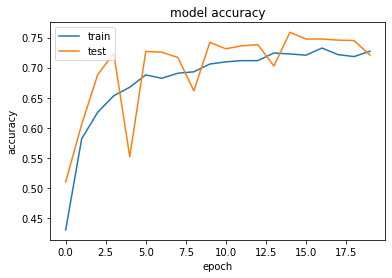

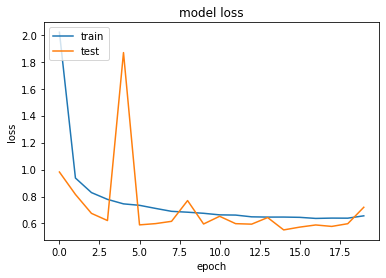

In [8]:
# list all data in history
print(history.history.keys())

# summarize history for accuracy
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [9]:
train_generator.class_indices

{'dyed-lifted-polyps': 0,
 'dyed-resection-margins': 1,
 'esophagitis': 2,
 'normal-cecum': 3,
 'normal-pylorus': 4,
 'normal-z-line': 5,
 'polyps': 6,
 'ulcerative-colitis': 7}

In [10]:
validation_generator.class_indices

{'dyed-lifted-polyps': 0,
 'dyed-resection-margins': 1,
 'esophagitis': 2,
 'normal-cecum': 3,
 'normal-pylorus': 4,
 'normal-z-line': 5,
 'polyps': 6,
 'ulcerative-colitis': 7}

In [0]:
# Save the model
model.save("SimpleModel1.h5")
!cp 'SimpleModel1.h5' 'drive/My Drive/ML/Models/'